In [ ]:
#!pip install googletrans==4.0.0rc1

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import json

from googletrans import Translator

In [156]:
df = pd.read_csv("datasets/Groceries_dataset.csv")

with open("config/github_access.json") as f:
  acces_to_github = json.load(f)

In [ ]:
df.shape

(38765, 3)

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [210]:
class Processingdata:

  def __init__(self,df):
    self.df_original = df
    self.translator = Translator()
  
  def transform_columns(self,df):
    
    # str to column
    df["Date"] = pd.to_datetime(df["Date"]) 
    df["yyyymm"] = df["Date"].apply(lambda x: datetime.strftime(x,"%Y-%m-01"))
    df["yyyymm"] = pd.to_datetime(df["yyyymm"]) 
    return df
  
  def translate_column(self,df,translator):
    
    dic_f = dict()
    lista_items = df["itemDescription"].unique().tolist()
    for item in lista_items:
      try:
        trans = translator.translate(item, src="en", dest='es').text
      except:
        trans = item  
        print(f"error en {item}")
      dic_f[item] = trans

    dic_f["pork"] = "cerdo"
    dic_f["turkey"] = "pavo"
    dic_f["cleaner"] = "limpiador"

    return dic_f

  def process(self):
    
    df_t = self.transform_columns(self.df_original)
    dic_f = self.translate_column(df_t,self.translator)
    df_clean = df_t.replace({"itemDescription":dic_f})
    self.df_clean = df_clean
    

In [211]:
clean = Processingdata(df)
clean.process()

error en pork
error en turkey
error en cleaner


In [212]:
clean.df_clean

,Member_number,Date,itemDescription,yyyymm
0,1808,2015-07-21,fruta tropical,2015-07-01
1,2552,2015-05-01,leche entera,2015-05-01
2,2300,2015-09-19,fruta,2015-09-01
3,1187,2015-12-12,Otras verduras,2015-12-01
4,3037,2015-01-02,leche entera,2015-01-01
...,...,...,...,...
38760,4471,2014-08-10,queso en rodajas,2014-08-01
38761,2022,2014-02-23,caramelo,2014-02-01
38762,1097,2014-04-16,barra de pastel,2014-04-01
38763,1510,2014-03-12,jugo de fruta/vegetal,2014-03-01


Top de productos por consumo

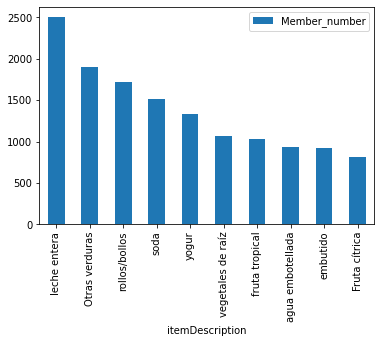

In [186]:
clean.df_clean.groupby("itemDescription").count()["Member_number"].reset_index().sort_values("Member_number",ascending=False).reset_index(drop=True).iloc[:10,:].plot.bar(x="itemDescription")

Top de Productos Menos comprados

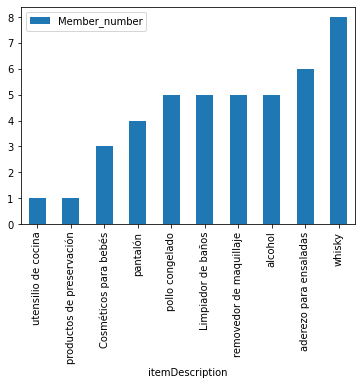

In [187]:
clean.df_clean.groupby("itemDescription").count()["Member_number"].reset_index().sort_values("Member_number").reset_index(drop=True).iloc[:10,:].plot.bar(x="itemDescription")

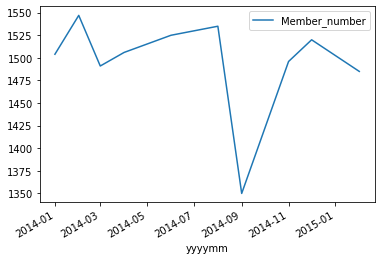

In [214]:
clean.df_clean.groupby("yyyymm").count()["Member_number"].reset_index().sort_values("Member_number").reset_index(drop=True).iloc[:10,:].plot(x="yyyymm")

In [263]:
top_5_by_year = clean.df_clean.groupby(["yyyymm","itemDescription"]).count()["Member_number"].reset_index().sort_values(["yyyymm","Member_number"],ascending=False)
top_5_by_year = top_5_by_year.groupby("yyyymm").head(5)

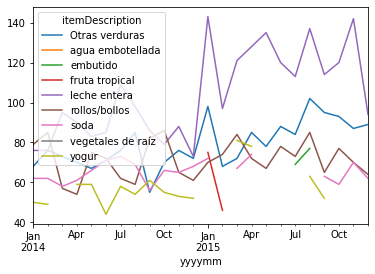

In [264]:
top_5_by_year.pivot(index="yyyymm",columns="itemDescription",values="Member_number").plot()

In [265]:
!git co

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   MarketBasket.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
